# Support Vector Machines

In [ ]:
# function to show scatterplot and SVM boundaries

In [1]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(12,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, alpha=0.7)

    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k',marker = 'x', s=70, cmap = mpl.cm.Paired, 
                                                      linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid()
    print('Number of support vectors: ', svc.support_.size)

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

### non-linearly separable dataset

In [ ]:
n = 20
np.random.seed(5)
X = np.random.randn(n,2)
y = np.repeat([1,-1],n/2)
X[y==-1]=X[y==-1]+1

In [9]:
X.shape

(20, 2)

In [10]:
y.shape

(20,)

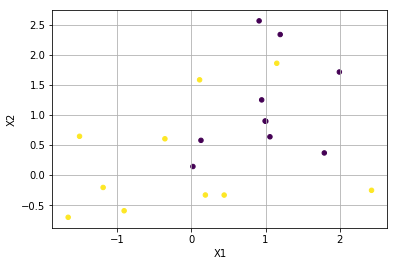

In [11]:
plt.scatter(X[:,0],X[:,1],s=20,c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

In [12]:
# not linearly separable

In [13]:
# fit a SVC with linear boundary and C=1

In [14]:
svc = SVC(C=1,kernel='linear')
svc.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
# use plot_svc() function

Number of support vectors:  13


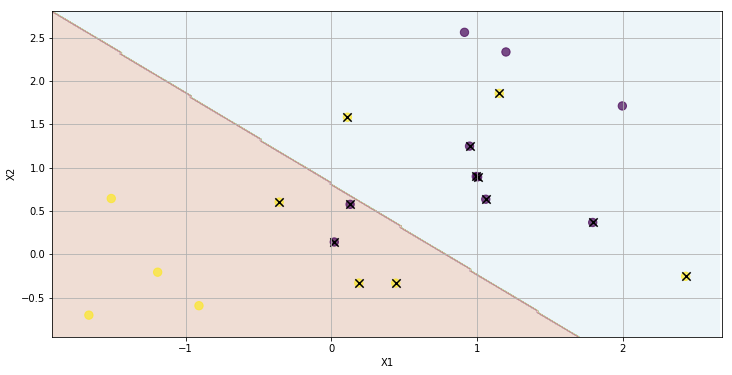

In [16]:
plot_svc(svc,X,y)

In [17]:
# region assigned to the -1 class is blue
# region assigned to the 1 class is brown

In [18]:
# support vectors are marked X

In [19]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8])

In [20]:
# decrease cost to C=0.10

Number of support vectors:  16


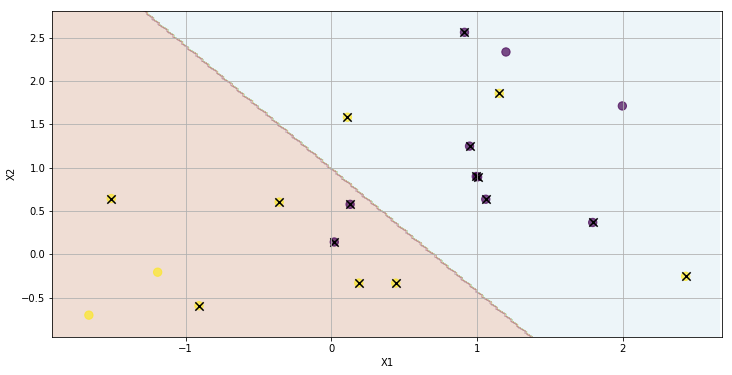

In [21]:
svc2 = SVC(C=0.1,kernel = 'linear')
svc2.fit(X,y)
plot_svc(svc2,X,y)

In [22]:
# decreasing cost C, increases number of support vectors

### Kfold Cross validation to find best cost C

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# 10-fold cross validation on cost

In [25]:
param_grid = [{'C':[0.001, 0.01, 0.1,1,5,100]}]

In [26]:
clf = GridSearchCV(SVC(kernel='linear'),param_grid,cv=10,scoring='accuracy',
                  return_train_score = True)
clf.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [27]:
# output of GridSearchCV

In [28]:
clf.cv_results_

{'mean_fit_time': array([0.00049829, 0.00059841, 0.0002003 , 0.00039892, 0.00039849,
        0.0006978 ]),
 'std_fit_time': array([0.0004983 , 0.00048863, 0.00040059, 0.00048858, 0.0006605 ,
        0.00045682]),
 'mean_score_time': array([0.00010078, 0.00039902, 0.        , 0.00049863, 0.0006979 ,
        0.00019946]),
 'std_score_time': array([0.00030234, 0.0004887 , 0.        , 0.00049863, 0.00045688,
        0.00039892]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1., 1., 1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1., 1., 1.]),
 'split

In [29]:
# best cost C

In [30]:
clf.best_params_

{'C': 0.001}

In [31]:
# test data

In [32]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1],20)
X_test[y_test==1] = X_test[y_test == 1] - 1

In [33]:
# test performance

In [34]:
svc2 = SVC(C=0.001,kernel = 'linear')
svc2.fit(X,y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,y_pred),index = svc2.classes_,
                                         columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


In [35]:
df1 = pd.DataFrame()
df1['y_test'] = y_test
df1['y_pred'] = y_pred
df1

,y_test,y_pred
0,-1,-1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,-1,1
8,-1,1
9,1,1


In [36]:
# misclassified rows

In [37]:
df1[y_test != y_pred]

,y_test,y_pred
7,-1,1
8,-1,1
12,-1,1
14,-1,1
15,-1,1
16,-1,1


In [38]:
# 14 of the test observations are correctly classified

### linearly separable classes

In [39]:
# modify test set

In [40]:
X_test[y_test==1] = X_test[y_test==1]-1

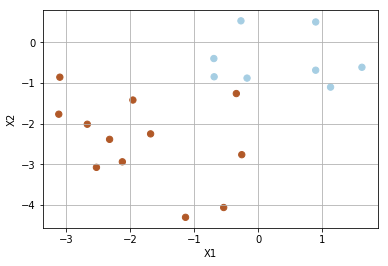

In [41]:
plt.scatter(X_test[:,0],X_test[:,1],s=40,
            c=y_test,cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

In [42]:
# now obs are just barely linearly separable

In [43]:
# increase cost C = 1e5 to get a small margin

Number of support vectors:  3


<Figure size 864x432 with 0 Axes>

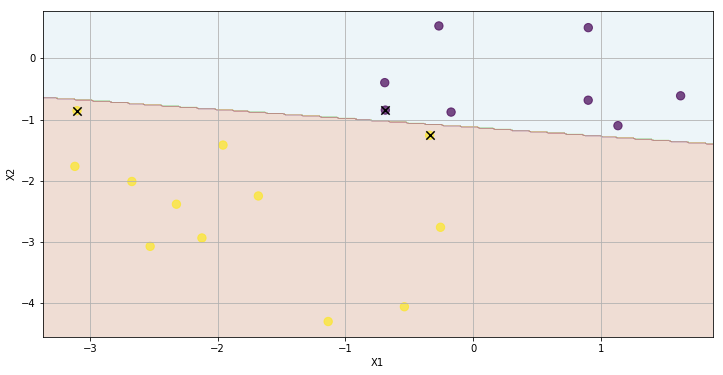

In [44]:
plt.figure(figsize=(12,6))
svc3 = SVC(C=1e5,kernel='linear')
svc3.fit(X_test,y_test)
plot_svc(svc3,X_test,y_test)

In [45]:
# the margin is very narrow since
# some obs that are not support vectors are close to the boundary

Number of support vectors:  5


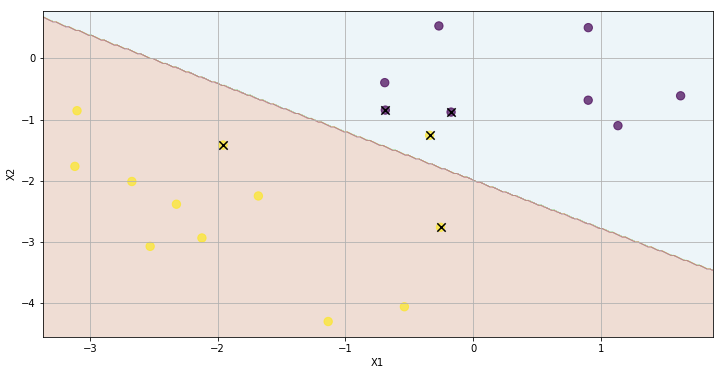

In [46]:
svc4 = SVC(C=1,kernel = 'linear')
svc4.fit(X_test,y_test)
plot_svc(svc4,X_test,y_test)

In [47]:
# Margin is wider, one yellow obs is misclassified

## Support Vector Machine -nonlinear kernel

In [48]:
# to fit polynomial SVM use kernel = 'poly'

### Validation approach

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100]+2
X[101:150] = X[101:150] - 2
y = np.concatenate([np.repeat(-1,150),np.repeat(1,50)])

In [51]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.5,
                                                 random_state = 2)

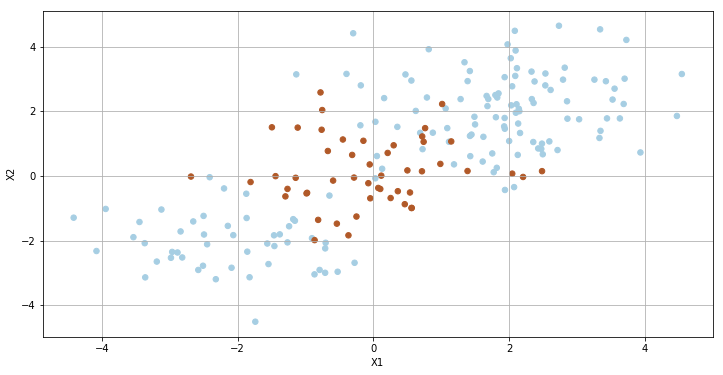

In [52]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0],X[:,1],s=30,c=y,cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

In [53]:
# one class is within the other class. Use radial kernel

In [54]:
# use C = 1, gamma = 1

In [55]:
svm = SVC(C=1.0,kernel = 'rbf', gamma = 1)
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Number of support vectors:  51


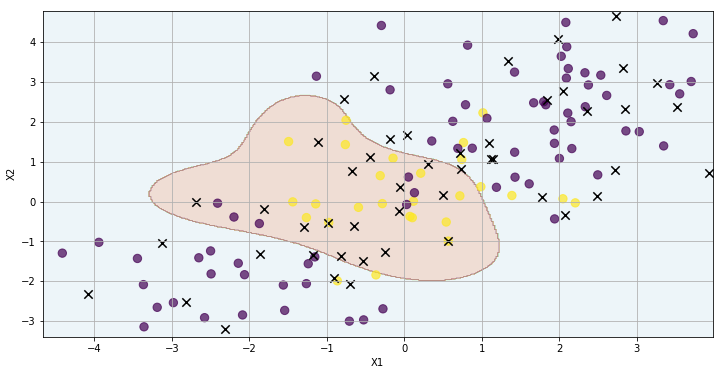

In [56]:
plot_svc(svm,X_test,y_test)

In [57]:
# increase the cost to C=10 to decrease the margin width

In [59]:
svm2 = SVC(C=10,kernel = 'rbf', gamma = 1.0)
svm2.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Number of support vectors:  42


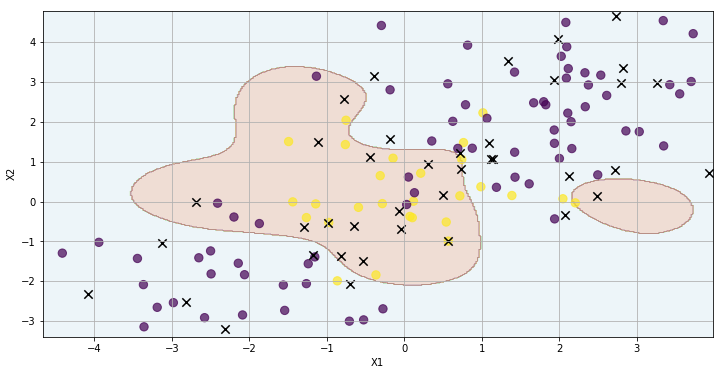

In [60]:
plot_svc(svm2,X_test,y_test)

In [61]:
# more irregular decision boundary

## Kfold cross-validation to select best choice of gamma and cost

In [62]:
param_grid = [{'C':[0.01,0.1,1,10,100],'gamma':[0.5,1,2,3,4]}]

In [64]:
clf = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=10,scoring='accuracy',
                                                      iid = False)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.5, 1, 2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [65]:
clf.best_params_

{'C': 1, 'gamma': 1}

In [66]:
# model with best params is already available

In [67]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Number of support vectors:  51


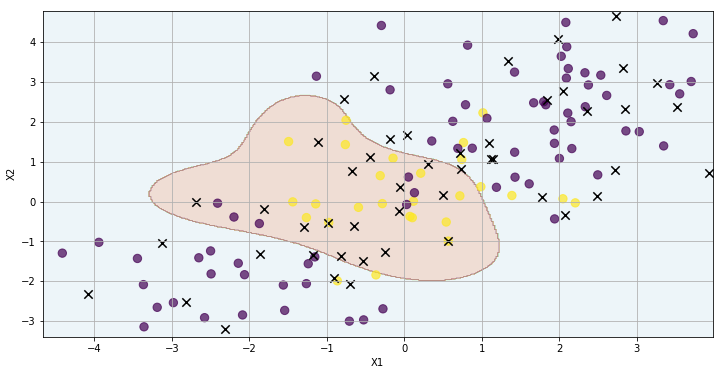

In [68]:
plot_svc(clf.best_estimator_, X_test,y_test)

In [69]:
# test accuracy rate

In [70]:
y_pred = clf.best_estimator_.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,y_pred),index=clf.best_estimator_.classes_,
                                           columns=clf.best_estimator_.classes_)

,-1,1
-1,67,6
1,9,18


In [71]:
clf.best_estimator_.score(X_test,y_test)

0.85

## ROC Curves

In [72]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [73]:
# compare gamma = 1 with gamma = 50 with same cost C=1

In [74]:
svm3 = SVC(kernel ='rbf',gamma = 1)
svm3.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
svm4 = SVC(kernel = 'rbf',gamma =50)
svm4.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
# use decision_function() to get fitted values

In [77]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

In [78]:
y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

In [79]:
# ROC rates

In [80]:
false_pos_rate3, true_pos_rate3,_ = roc_curve(y_train,y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

In [81]:
false_pos_rate4, true_pos_rate4,_ = roc_curve(y_train,y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

In [84]:
false_pos_rate33, true_pos_rate33,_ = roc_curve(y_test,y_test_score3)
roc_auc33 = auc(false_pos_rate33, true_pos_rate33)

In [85]:
false_pos_rate44, true_pos_rate44,_ = roc_curve(y_test,y_test_score4)
roc_auc44 = auc(false_pos_rate44, true_pos_rate44)

In [86]:
# split window

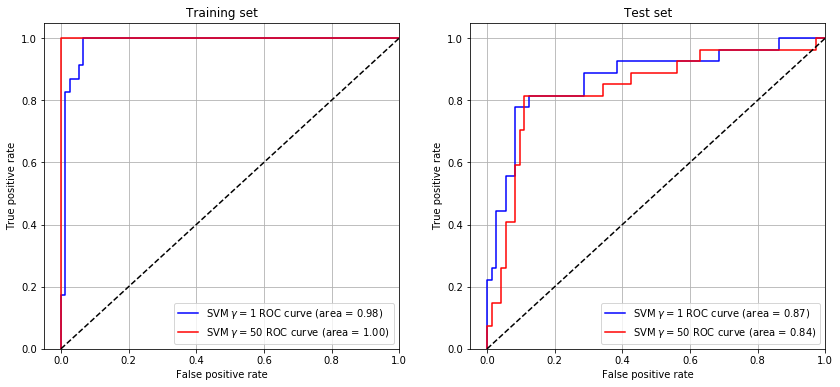

In [89]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
# plot ROC curve for training set
ax1.plot(false_pos_rate3,true_pos_rate3,label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3,color='b')
ax1.plot(false_pos_rate4,true_pos_rate4,label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4,color='r')
ax1.set_title('Training set')

# plot ROC curve for test set
ax2.plot(false_pos_rate33,true_pos_rate33,label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc33,color='b')
ax2.plot(false_pos_rate44,true_pos_rate44,label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc44,color='r')
ax2.set_title('Test set')

# add common attributes
for ax in fig.axes:
    ax.plot([0,1],[0,1],'k--')
    ax.set_xlim([-0.05,1])
    ax.set_ylim([0,1.05])
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.legend(loc='lower right')
    ax.grid()